In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
fruits = pd.read_table('fruits.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape

(59, 7)

In [5]:
fruits.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

<AxesSubplot:xlabel='fruit_name'>

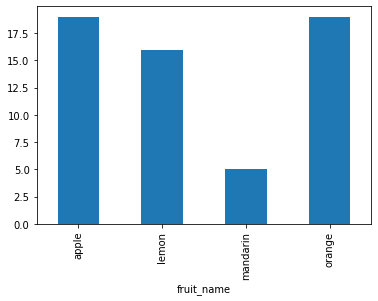

In [6]:
counts = _
counts.plot(kind='bar')

In [7]:
label_removed = fruits.drop('fruit_label', axis=1)

In [8]:
label_removed.head()

,fruit_name,fruit_subtype,mass,width,height,color_score
0,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
2,apple,granny_smith,176,7.4,7.2,0.60
3,mandarin,mandarin,86,6.2,4.7,0.80
4,mandarin,mandarin,84,6.0,4.6,0.79


mass              AxesSubplot(0.125,0.536818;0.352273x0.343182)
width          AxesSubplot(0.547727,0.536818;0.352273x0.343182)
height               AxesSubplot(0.125,0.125;0.352273x0.343182)
color_score       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

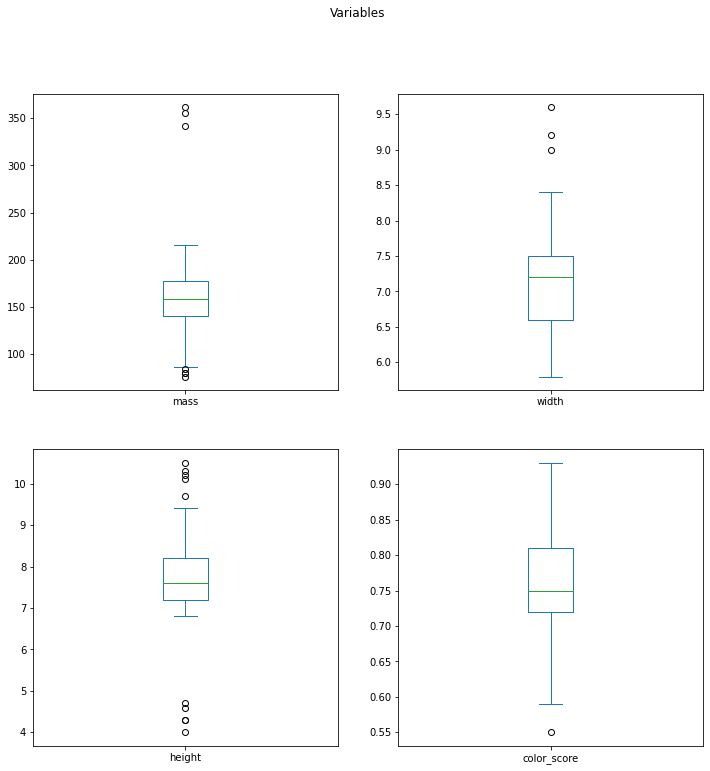

In [9]:
label_removed.plot(kind='box', subplots=True, layout=(2,2), title='Variables', figsize=(12, 12))

array([[<AxesSubplot:title={'center':'mass'}>,
        <AxesSubplot:title={'center':'width'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'color_score'}>]], dtype=object)

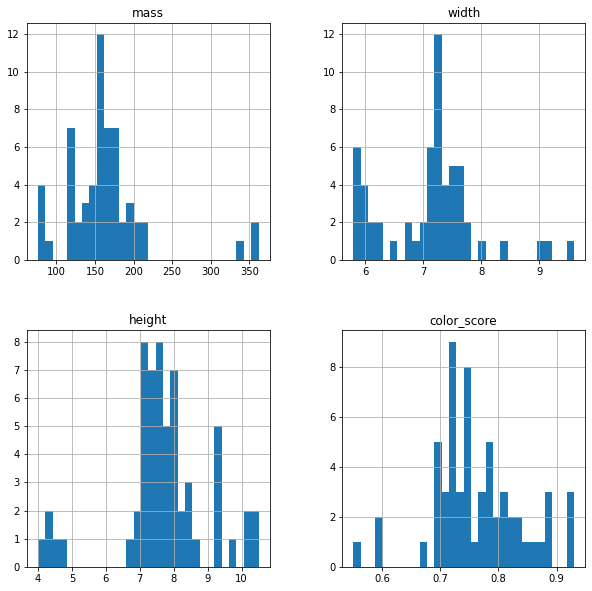

In [10]:
label_removed.hist(bins=30, figsize=(10, 10))

In [11]:
feature_names = ['mass', 'width', 'height', 'color_score']

In [12]:
X = fruits[feature_names]
y = fruits['fruit_label']

from matplotlib import cm

cmap = cm.get_cmap('gnuplot')

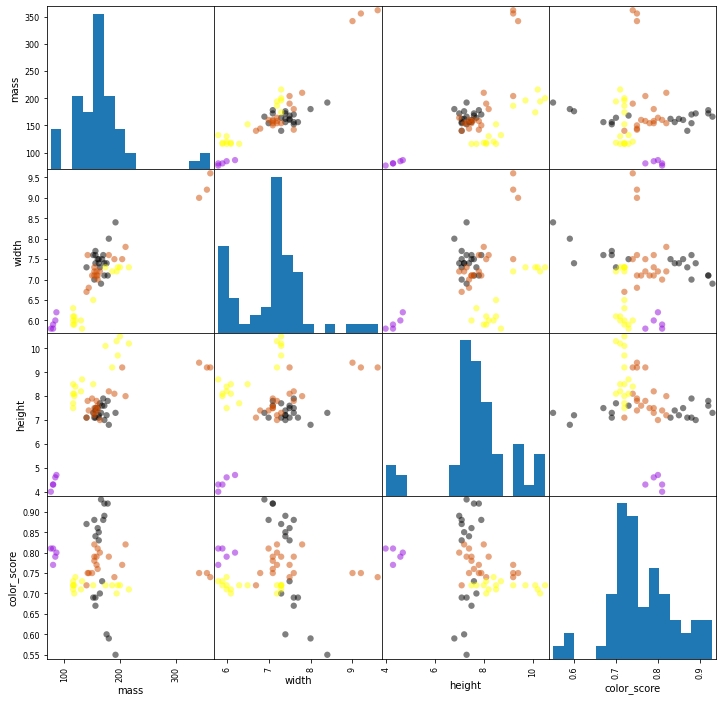

In [13]:
scatter = pd.plotting.scatter_matrix(X, c=y, marker='o', s=40, hist_kwds={'bins': 15}, cmap=cmap, figsize=(12,12))

In [14]:
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [15]:
X.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
44 / 59

0.7457627118644068

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train[:4]

array([[0.27857143, 0.41176471, 0.49230769, 0.72972973],
       [0.35      , 0.44117647, 0.93846154, 0.45945946],
       [0.        , 0.        , 0.        , 0.7027027 ],
       [0.27142857, 0.52941176, 0.50769231, 0.37837838]])

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
logreg.score(X_train, y_train)

0.75

In [23]:
logreg.score(X_test, y_test)

0.4666666666666667

TODO: play with `train_test_split` sizes.

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.6666666666666666


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9545454545454546
1.0


In [26]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train, y_train)
print(sv.score(X_train, y_train))
print(sv.score(X_test, y_test))

0.9090909090909091
0.8


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
pred = knn.predict(X_test)

In [29]:
confusion_matrix(pred, y_test)

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 8, 0],
       [0, 0, 0, 2]])

In [30]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [31]:
k_range = range(1, 20)

In [36]:
y_test.shape

(15,)

In [32]:
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

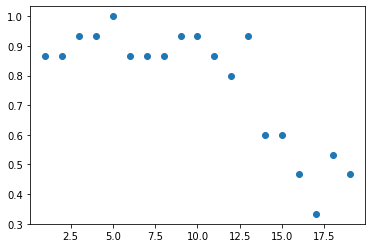

In [33]:
plt.scatter(k_range, scores)